<a href="https://colab.research.google.com/github/MNour857/DataScience-Tasks/blob/master/ML_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**K-MEAN Clustering on IRIS Data Set
Unsupervised Machine Learning**

In [2]:
#Importing Libraries
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Iris.csv to Iris.csv


In [13]:
df = pd.read_csv("Iris.csv")
df.head(10) #Prining 10 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [14]:
df = df.drop(columns=['Species', 'Id']) #dropping the 'Species' and 'Id' columns.
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


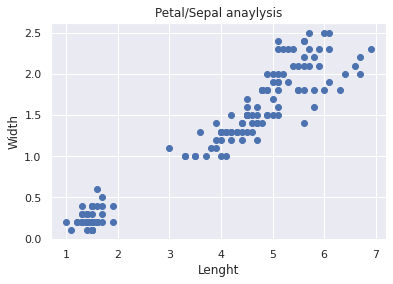

In [15]:
def scatter_plot(dataset, col1, col2):
    plt.scatter(dataset.iloc[:, col1], dataset.iloc[:, col2])
    plt.xlabel("Lenght")
    plt.ylabel("Width")
    plt.title("Petal/Sepal anaylysis")


scatter_plot(df, 2, 3)  # visualizing petal data

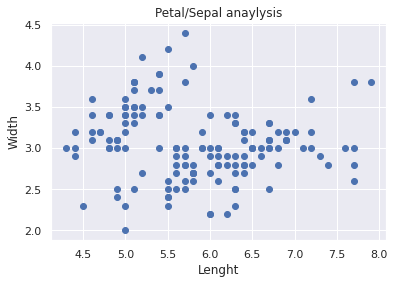

In [16]:
scatter_plot(df, 0, 1)  # visualizing sepal data

In [17]:
df.describe()  # looking into the data for insights

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


For a better understading of the data let's take a look at the correlation between different multidimentional features¶


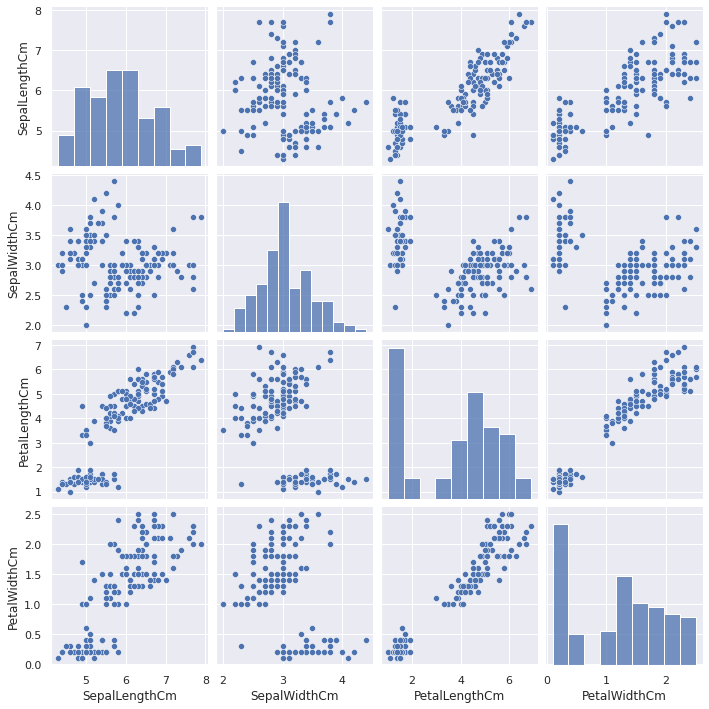

In [18]:
sns.pairplot(df)


In [19]:
#Normalization
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)  # scaling dataframe
scaled_features.shape
scaled_features[:3]  # these are the normalized feature set between 0-1

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667]])

**Elbow** **Method** to find number of clusters

In [21]:
from sklearn.cluster import KMeans

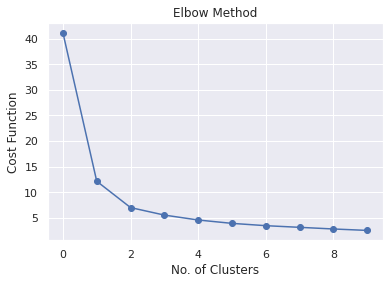

In [22]:
def elbow():

    cost = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit_predict(scaled_features)
        cost.append(kmeans.inertia_)

    plt.plot(np.arange(0, 10), cost, marker='o')
    plt.title("Elbow Method")
    plt.xlabel("No. of Clusters")
    plt.ylabel("Cost Function")


elbow()

In [23]:
# To find the prdeicted categories through K-means
kmeans = KMeans(n_clusters=3)
y_pred = kmeans.fit_predict(scaled_features)
y_pred  #this is the predictied categories

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [24]:
# Making normalized dataset
df["SepalLengthCm"] = scaled_features[:, 0]
df["SepalWidthCm"] = scaled_features[:, 1]
df["PetalLengthCm"] = scaled_features[:, 2]
df["PetalWidthCm"] = scaled_features[:, 3]
df["Clusters"] = y_pred
df.head()  # Normalized dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Clusters
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.041667,0


Storing The Clusters

In [25]:
# Making Petal Clusters
pet_cluster1 = df[df['Clusters'] == 0].reset_index(drop=True)
pet_cluster1.head(3)
pet_cluster2 = df[df['Clusters'] == 1].reset_index(drop=True)
pet_cluster3 = df[df['Clusters'] == 2].reset_index(drop=True)

In [26]:
# Making Sepal Clusters
sep_cluster1 = df[df['Clusters'] == 0].reset_index(drop=True)
sep_cluster2 = df[df['Clusters'] == 1].reset_index(drop=True)
sep_cluster3 = df[df['Clusters'] == 2].reset_index(drop=True)

Visulization of Clusters

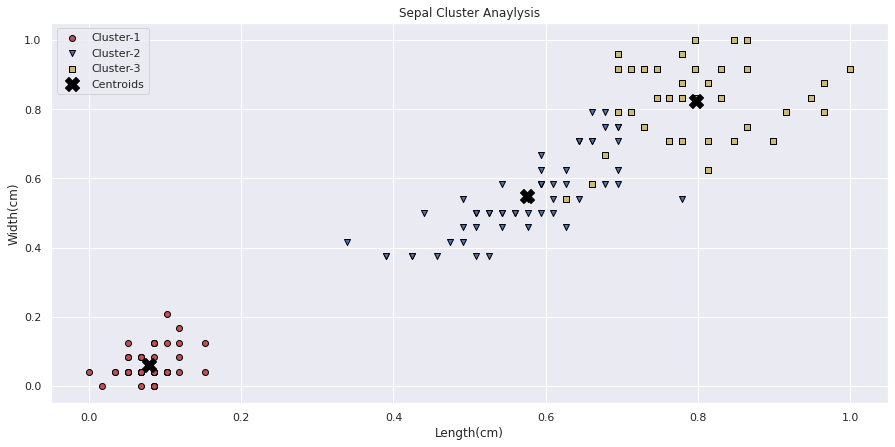

In [27]:
# Plotting clusters
def plot_sep_cluster():
    plt.figure(figsize=(15, 7))

    plt.scatter(sep_cluster1.iloc[:, 2], sep_cluster1.iloc[:, 3], c='r',
                marker='o', edgecolors='black', label="Cluster-1")
    plt.scatter(sep_cluster2.iloc[:, 2], sep_cluster2.iloc[:, 3], c='b',
                marker='v', edgecolors='black', label="Cluster-2")
    plt.scatter(sep_cluster3.iloc[:, 2], sep_cluster3.iloc[:, 3], c='y',
                marker='s', edgecolors='black', label="Cluster-3")

    centers = kmeans.cluster_centers_[:, -2:]  # cluster center for petals
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label="Centroids")

    plt.xlabel('Length(cm)')
    plt.ylabel('Width(cm)')
    plt.legend()
    plt.title("Sepal Cluster Anaylysis")
    plt.show()


plot_sep_cluster()

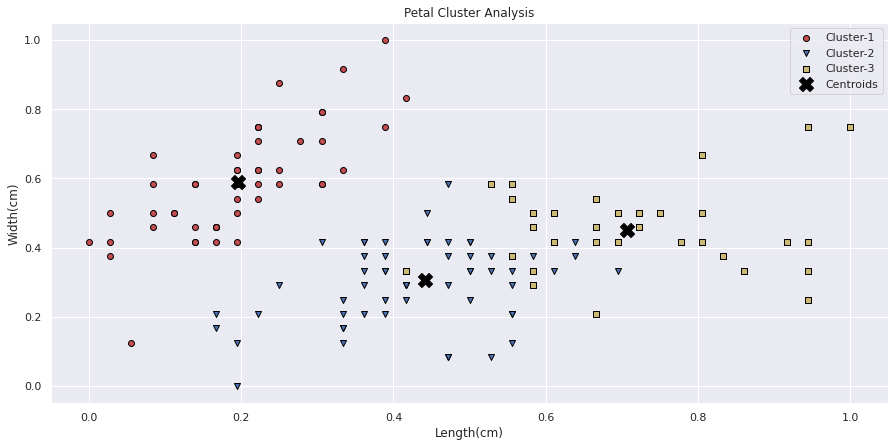

In [28]:
def plot_pet_cluster():
    plt.figure(figsize=(15, 7))

    plt.scatter(pet_cluster1.iloc[:, 0], pet_cluster1.iloc[:, 1], c='r',
                marker='o', edgecolors='black', label="Cluster-1")
    plt.scatter(pet_cluster2.iloc[:, 0], pet_cluster2.iloc[:, 1], c='b',
                marker='v', edgecolors='black', label="Cluster-2")
    plt.scatter(pet_cluster3.iloc[:, 0], pet_cluster3.iloc[:, 1], c='y',
                marker='s', edgecolors='black', label="Cluster-3")

    centers = kmeans.cluster_centers_[:, :-2]  # cluster center for petals
    centers
    plt.scatter(centers[:, 0], centers[:, 1], c='black', marker='X', s=200, label="Centroids")

    plt.xlabel('Length(cm)')
    plt.ylabel('Width(cm)')
    plt.legend()
    plt.title("Petal Cluster Analysis")
    plt.show()


plot_pet_cluster()